# Wordcloud of LoL Summoner Name
리그오브레전드 소환사 이름 기반 워드클라우드 분석

## 주의사항 및 라이브러리 설치

구글 Colab에는 한글 폰트가 설치되어 있지 않으므로, Wordcloud를 나타날 때 오류가 발생한다.<br>
따라서 아래 셀을 실행하여 `나눔폰트`를 설치하여야 한다.

설치 후에는 상단 메뉴의 **`런타임` > `런타임 다시 시작`**을 눌러 **재실행**하여야지 정상적으로 적용된다.

In [ ]:
!pip3 install konlpy
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 453 kB 50.8 MB/s 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155680 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (201

다시 한 번 말하지만, **`런타임 다시 시작`** 필수!!

## 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm
from nltk.corpus import stopwords
import nltk
from collections import Counter
import matplotlib.image as img

기본값 설정

In [ ]:
okt = Okt()
nltk.download('stopwords')
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 데이터 다운로드

In [ ]:
urllib.request.urlretrieve("https://media.githubusercontent.com/media/oneonlee/Prediction-of-LoL-Tier-with-Summoner-Name/main/data/lol_raw_data.csv", filename="lol_raw_data.csv")

In [ ]:
df = pd.read_csv("lol_raw_data.csv")

In [ ]:
df = df[['nickname']]

In [ ]:
minimum_word_length = 2
noun_adj_list = []
korean_stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '입니다', '있음', '있어', '뭐', '구나', '끼리', '해도']
english_stopwords = stopwords.words('english')

## 토큰화 (형태소 분리)

In [ ]:
for nickname in tqdm(df['nickname']):
    # konlpy의 okt를 통한 형태소 분리
    name_tag = okt.pos(nickname) 

    for word, tag in name_tag:
        if tag in ['Noun' , 'Adjective', 'Alpha']: # konlpy를 통해 명사, 형용사, 알파벳만 추출
            if (word not in korean_stopwords) and (word not in english_stopwords): # 불용어(stopwords) 제거
                if len(word) >= minimum_word_length: # 단어의 글자 수
                    noun_adj_list.append(word)

100%|██████████| 3718157/3718157 [28:55<00:00, 2142.72it/s]


## 워드클라우드 생성

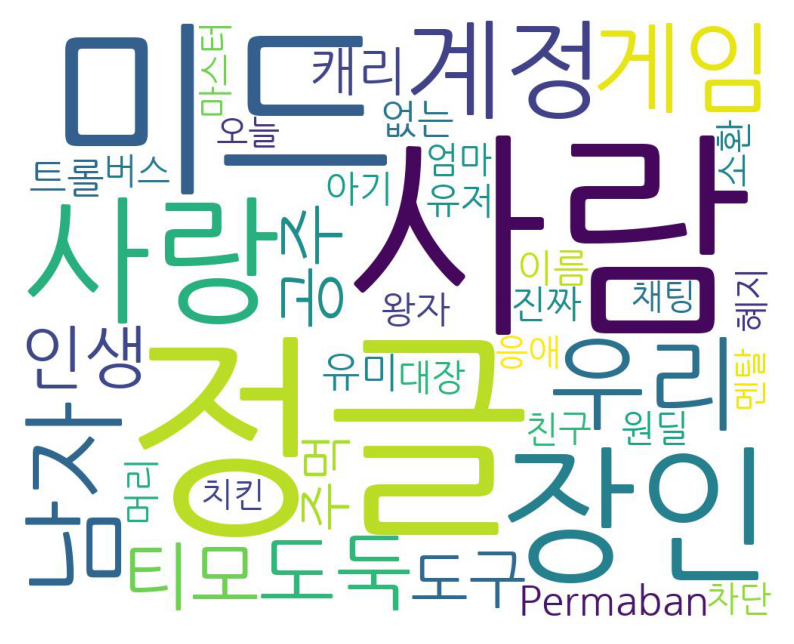

In [ ]:
# noun_adj_list에서 빈도 수가 가장 높은 40개의 단어만 추출
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 

# wordcloud 생성
wc = WordCloud(font_path,background_color="white", width=1000, height=800)#, max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))
cloud.to_file('wordcloud.jpg') # 파일 저장

# 저장한 파일을 불러옴
image = img.imread('wordcloud.jpg')
plt.figure(dpi=200)
plt.axis('off')
plt.imshow(image)
plt.show() 